# Introduction to computer vision

In the previous chapter I have created a very simple neural network that finds the relationship between two sets of points. Now lets try adding some more layers to our neural network and work with images. 

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.1


In [2]:
# Package for ploting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Numerical operations
import numpy as np

# Random number generation
import random

I will work with the famous fashion MNIST data set. The data set consists of 70k 28x28 pixels grayscale images of fashion items that fall into one of 10 categories. The labels and their categories are:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [3]:
# Creating the dictionary for class labels
label_dict = {
    '0': 'tshirt',
    '1': 'trouser', 
    '2': 'pullover',
    '3': 'dress',
    '4': 'coat',
    '5': 'sandal',
    '6': 'shirt',
    '7': 'sneaker',
    '8': 'bag',
    '9': 'ankle boot'
}

In [4]:
# Initiating the class
mnist = tf.keras.datasets.fashion_mnist

# Downloading the data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

The data is automatically split into the train set and the test set.

In [5]:
training_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

Let us see some random images from the training set. 

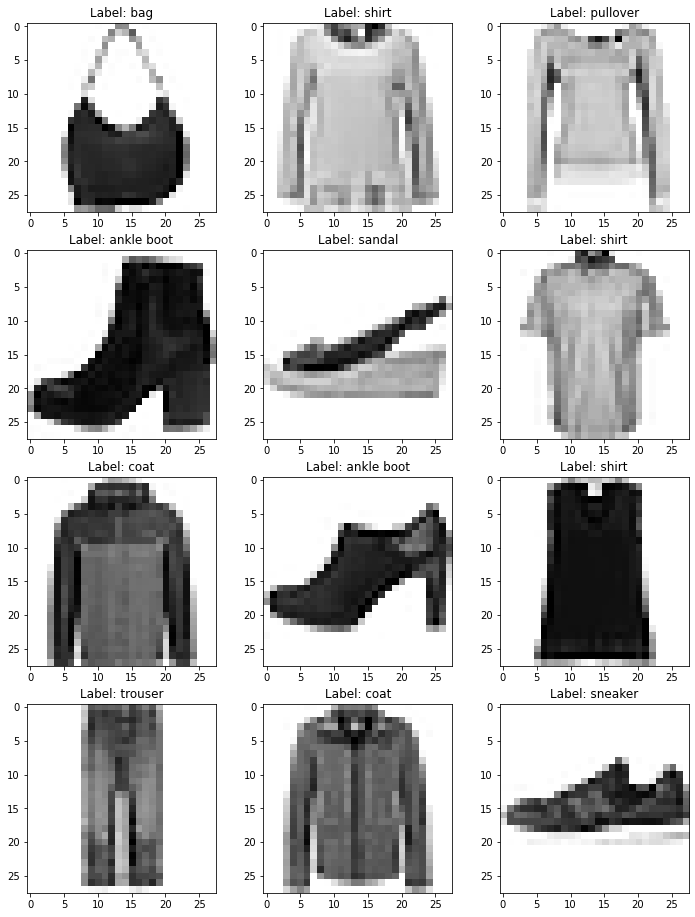

In [18]:
# Defining the number of random images
n = 12 

# Figure size
plt.figure(figsize=(12, 16))

for i, _ in enumerate(range(n)):
    # Generating a random int 
    rint = random.randint(0, len(training_images))
    
    # Ploting the image
    plt.subplot(4, 3, i + 1)
    plt.imshow(training_images[rint], cmap=plt.cm.binary)
    plt.title(f"Label: {label_dict.get(str(training_labels[rint]))}")
plt.show()

Let see how one image looks like in the array format and how does it look like rendered:

In [8]:
np.set_printoptions(linewidth=200)
print(training_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

There are 28 rows and 28 columns in the numpy array. The values of each pixel is between 0 an d 255, where zero is total white and 255 is total black. 

Just from the numbers you can kind of see that this is a shirt. 

In [9]:
print(training_labels[1])

0


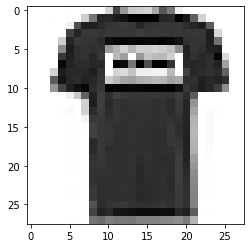

In [10]:
plt.imshow(training_images[1], cmap=plt.cm.binary)

The way that a computer 'sees' an image is only by the pixel values represented above. Even the most advanced image recognition algorithms use just the pixels converted into arrays of numbers. 

Basicaly, when we are talking about computer vision we are talking about the computer learning the relationship between a matrix of numbers and a label.  

# Simple deep learning model for images

## Defining the model

You'll notice that all of the values in the number matrix are between 0 and 255. If we are training a neural network it is easier if we treat all values between 0 and 1. This process is called **normalizing**.

In [11]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Model definition:

In [12]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(256, activation=tf.nn.relu), 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Flatten takes that square of numbers of the images (remember the tshirt pixel array?) and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

**tf.nn.relu**: relu activation function that follows a simple rule: "if X>0 return X, else return 0" 

**Softmax**: a layer that takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0].

To illustrate better the Flatten layer, consider that we have a 2x3 matrix:

$$\begin{bmatrix}
1 & 2 & 0\\
154 & 255 & 0
\end{bmatrix}_{2x3}$$	

The flatten layer would convert this matrix into a vector of size 6:

$$\begin{bmatrix}
1 & 2 & 0 & 154 & 255 & 0
\end{bmatrix}$$	

Each 28x28 image in our dataset would be flattened to 784 length vector.

## Fitting and forecasting

In [13]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(training_images, training_labels, epochs=10)

print(f'Test accuracy: {model.evaluate(test_images, test_labels, verbose=False)[1]}')

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4825 - accuracy: 0.8278
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3657 - accuracy: 0.8673
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3273 - accuracy: 0.8804
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3035 - accuracy: 0.8888
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2847 - accuracy: 0.8945
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2680 - accuracy: 0.9014
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2564 - accuracy: 0.9049
Epoch 8/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2452 - accuracy: 0.9087
Epoch 9/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2355 - accuracy: 0.9112
Epoch 10/10
60

The evaluate method returns a loss value and the accuracy value. The accuracy is about 88 percent which means that in the unseen data our model succesfuly predicted 88 percent of the labels! 

# Callbacks

In computer programming, a callback, also known as a "call-after" function, is any executable code that is passed as an argument to other code; that other code is expected to call back (execute) the argument at a given time.

Tensorflow has a built in callback implementation as well. To read about all the possible callbacks visit: 
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback

For example, image that we are satisfied with a training accuracy of 0.85 and we do not want to spend more time training the network. We can initiate a tensorflow callback and stop the training at any treshold that we want. 

The class for this is **tf.keras.callbacks.Callback**:

In [14]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        acc = logs.get('accuracy', logs.get('acc'))
        if(acc>0.85):
            print("\nReached 85% accuracy so cancelling training!")
            self.model.stop_training = True
    
callbacks = myCallback()

**on_epoch_end** is just one of many functions that we can use

Let us wrap everything into a function:

In [15]:
def train_mnist_fashion(acc_tresh=None):
    """
    A method to train a neural network using mnist fashion dataset
    """
    # Initiating the callbacks
    
    if acc_tresh is None:
        acc_tresh = 1
    
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            acc = logs.get('accuracy', logs.get('acc'))
            if(acc>acc_tresh):
                print(f"\nReached {acc_tresh * 100}% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()
        
    # Loading the dataset
    mnist = tf.keras.datasets.fashion_mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()

    training_images, test_images = training_images / 255.0, test_images / 255.0

    # Defining the model
    model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Fitting the model
    history = model.fit(
        # YOUR CODE STARTS HERE
        training_images,
        training_labels,
        callbacks=[callbacks],
        epochs=20
    )
    return history.epoch, history.history['accuracy'][-1]

In [16]:
train_mnist_fashion(acc_tresh=0.85)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4754 - accuracy: 0.8303
Epoch 2/20
59648/60000 [============================>.] - ETA: 0s - loss: 0.3564 - accuracy: 0.8695
Reached 85.0% accuracy so cancelling training!
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3563 - accuracy: 0.8696


([0, 1], 0.8695667)